## Here, we will re-run the code modules written in the blog of [Text Data Pre-Processing](https://www.enjoyalgorithms.com/blog/text-data-pre-processing-techniques-in-ml/)

In [27]:
import pandas as pd

tweets = pd.read_csv('Corona_NLP_train.csv', encoding='ISO-8859-1')

print(tweets.head())

   UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia: Woolworths to give elde...            Positive  
3  My food stock is not the only one which is emp...            Positive  
4  Me, ready to go at supermarket during the #COV...  Extremely Negative  


In [28]:
tweets.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [29]:
tweets = tweets[['OriginalTweet', 'Sentiment']] #extraction
tweets.columns = ['Text', 'Sentiment'] #renaming

In [30]:
tweets['Text'] = tweets['Text'].str.lower()
tweets.head()

,Text,Sentiment
0,@menyrbie @phil_gahan @chrisitv https://t.co/i...,Neutral
1,advice talk to your neighbours family to excha...,Positive
2,coronavirus australia: woolworths to give elde...,Positive
3,my food stock is not the only one which is emp...,Positive
4,"me, ready to go at supermarket during the #cov...",Extremely Negative


In [31]:
tweets['Text'] = tweets['Text'].str.replace(r"http\S+", "", regex=True)
tweets.head()

,Text,Sentiment
0,@menyrbie @phil_gahan @chrisitv and and,Neutral
1,advice talk to your neighbours family to excha...,Positive
2,coronavirus australia: woolworths to give elde...,Positive
3,my food stock is not the only one which is emp...,Positive
4,"me, ready to go at supermarket during the #cov...",Extremely Negative


In [32]:
tweets['Text'] = tweets['Text'].str.replace('[^A-Za-z0-9]+',' ', regex=True)
tweets.head()

,Text,Sentiment
0,menyrbie phil gahan chrisitv and and,Neutral
1,advice talk to your neighbours family to excha...,Positive
2,coronavirus australia woolworths to give elder...,Positive
3,my food stock is not the only one which is emp...,Positive
4,me ready to go at supermarket during the covid...,Extremely Negative


In [33]:
import nltk
from nltk.corpus import stopwords
## NLTK library provides the set of stop words for English

stopwords = stopwords.words('english')

tweets['Text'] = tweets['Text'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stopwords))
print(tweets.head())

                                                Text           Sentiment
0                       menyrbie phil gahan chrisitv             Neutral
1  advice talk neighbours family exchange phone n...            Positive
2  coronavirus australia woolworths give elderly ...            Positive
3  food stock one empty please panic enough food ...            Positive
4  ready go supermarket covid19 outbreak paranoid...  Extremely Negative


In [42]:
from textblob import TextBlob

print(str(TextBlob('advice talk neighbours family exchange phone').correct()))

tweets['Text'][0]

advice talk neighbours family exchange phone


'menyrbie phil gahan chrisitv'

In [ ]:
for i in range(tweets.shape[0]):
    if i%100 == 0:
        print(i)
    tweets['Text'][i] = TextBlob(str(tweets['Text'][i])).correct()


0
100
200
300
400
500
600
700
800


In [39]:
tweets['Text'] = tweets['Text'].apply(lambda x: str(TextBlob(str(x)).correct()))

KeyboardInterrupt: 

In [9]:
import nltk
word_data = "Enjoyalgorithms is a nice platform for computer science education."
nltk_tokens = nltk.word_tokenize(word_data)
print (nltk_tokens)

['Enjoyalgorithms', 'is', 'a', 'nice', 'platform', 'for', 'computer', 'science', 'education', '.']


In [12]:
import nltk

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in  w_tokenizer.tokenize(text)]

tweets['lemmatized_tokens'] = tweets['Text'].apply(lemmatize_text)
tweets.head()

,Text,Sentiment,lemmatized_tokens
0,menyrbie phil gahan chrisitv,Neutral,"[menyrbie, phil, gahan, chrisitv]"
1,advice talk neighbours family exchange phone n...,Positive,"[advice, talk, neighbour, family, exchange, ph..."
2,coronavirus australia woolworths give elderly ...,Positive,"[coronavirus, australia, woolworth, give, elde..."
3,food stock one empty please panic enough food ...,Positive,"[food, stock, one, empty, please, panic, enoug..."
4,ready go supermarket covid19 outbreak paranoid...,Extremely Negative,"[ready, go, supermarket, covid19, outbreak, pa..."


In [13]:
tweets['word_length'] = tweets['Text'].str.split().str.len()
tweets.head()

,Text,Sentiment,lemmatized_tokens,word_length
0,menyrbie phil gahan chrisitv,Neutral,"[menyrbie, phil, gahan, chrisitv]",4
1,advice talk neighbours family exchange phone n...,Positive,"[advice, talk, neighbour, family, exchange, ph...",27
2,coronavirus australia woolworths give elderly ...,Positive,"[coronavirus, australia, woolworth, give, elde...",13
3,food stock one empty please panic enough food ...,Positive,"[food, stock, one, empty, please, panic, enoug...",23
4,ready go supermarket covid19 outbreak paranoid...,Extremely Negative,"[ready, go, supermarket, covid19, outbreak, pa...",21


Matplotlib created a temporary config/cache directory at /var/folders/w1/ddjn79r10gb30q27xq0t_fjw0000gn/T/matplotlib-_g26zipz because the default path (/Users/ravishkumar/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
fc-list: major issue: So far, no MiKTeX administrator has checked for updates.
fc-list: major issue: So far, no MiKTeX administrator has checked for updates.
/var/folders/w1/ddjn79r10gb30q27xq0t_fjw0000gn/T/ipykernel_1894/4288097276.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(tweets.loc[(tweets['Sentiment']==label), 'word_length'], color=clr, shade=True, label=label)
/var/folders/w1/ddjn79r10gb30q27xq0t_fjw0000gn/T/ipykernel_1894/4288097276.py:11: FutureWarning: 



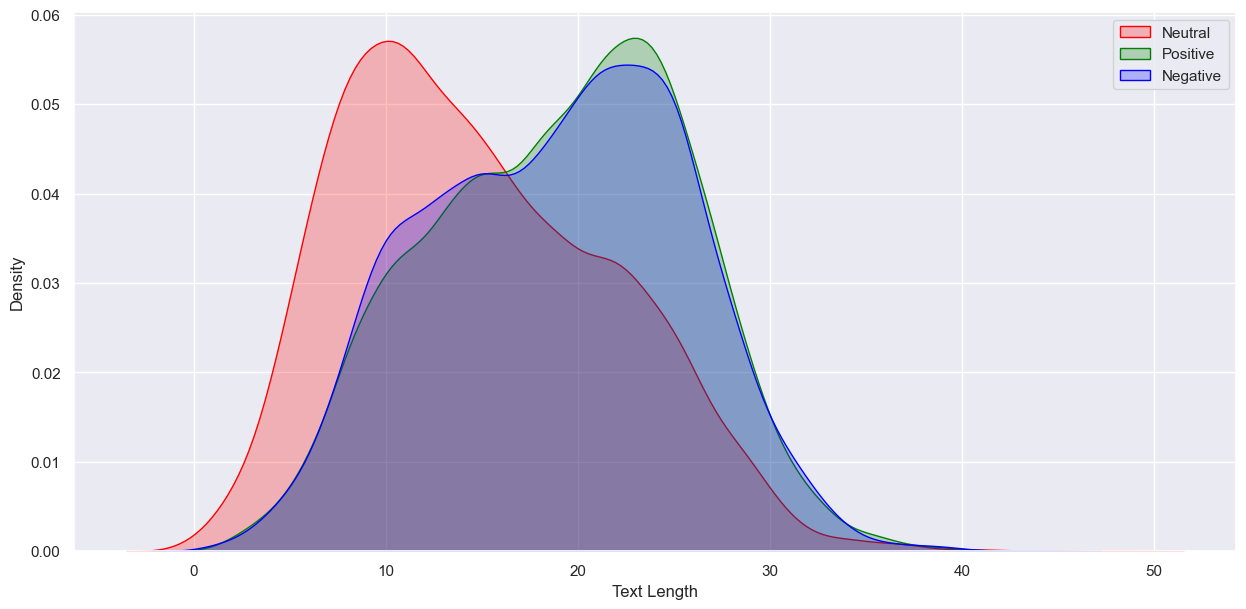

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
plt.figure(figsize=(15,7))

cmap = ["red", "green", "blue"]
labels = ["Neutral", "Positive", "Negative"]

for label,clr in zip(labels,cmap):
    sns.kdeplot(tweets.loc[(tweets['Sentiment']==label), 'word_length'], color=clr, shade=True, label=label) 
    plt.xlabel('Text Length') 
    plt.ylabel('Density')
    plt.legend()

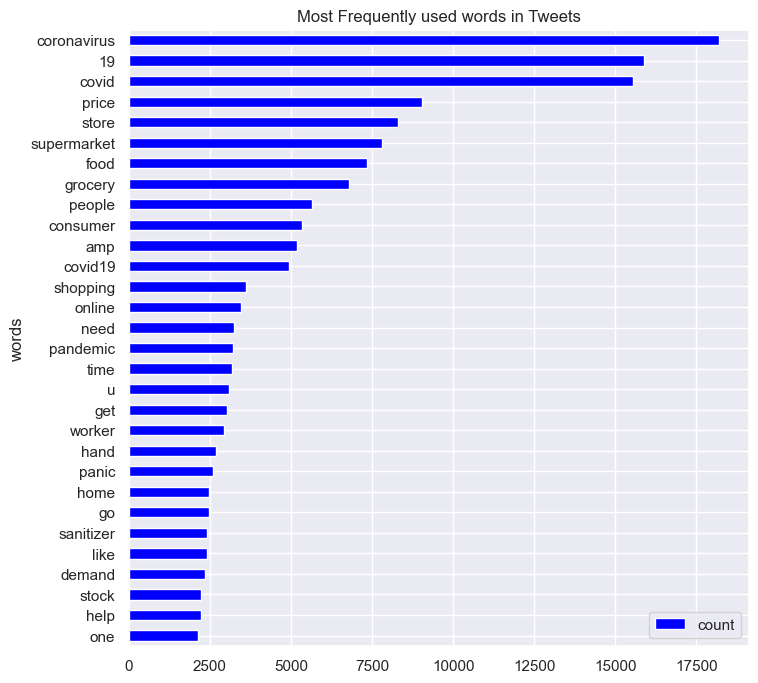

In [15]:
import itertools
import collections
import pandas as pd
import matplotlib.pyplot as plt

lemmatized_tokens = list(tweets["lemmatized_tokens"])

token_list = list(itertools.chain(*lemmatized_tokens))

counts_no = collections.Counter(token_list)

clean_tweets = pd.DataFrame(counts_no.most_common(30),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

clean_tweets.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="blue")

ax.set_title("Most Frequently used words in Tweets")
plt.show()

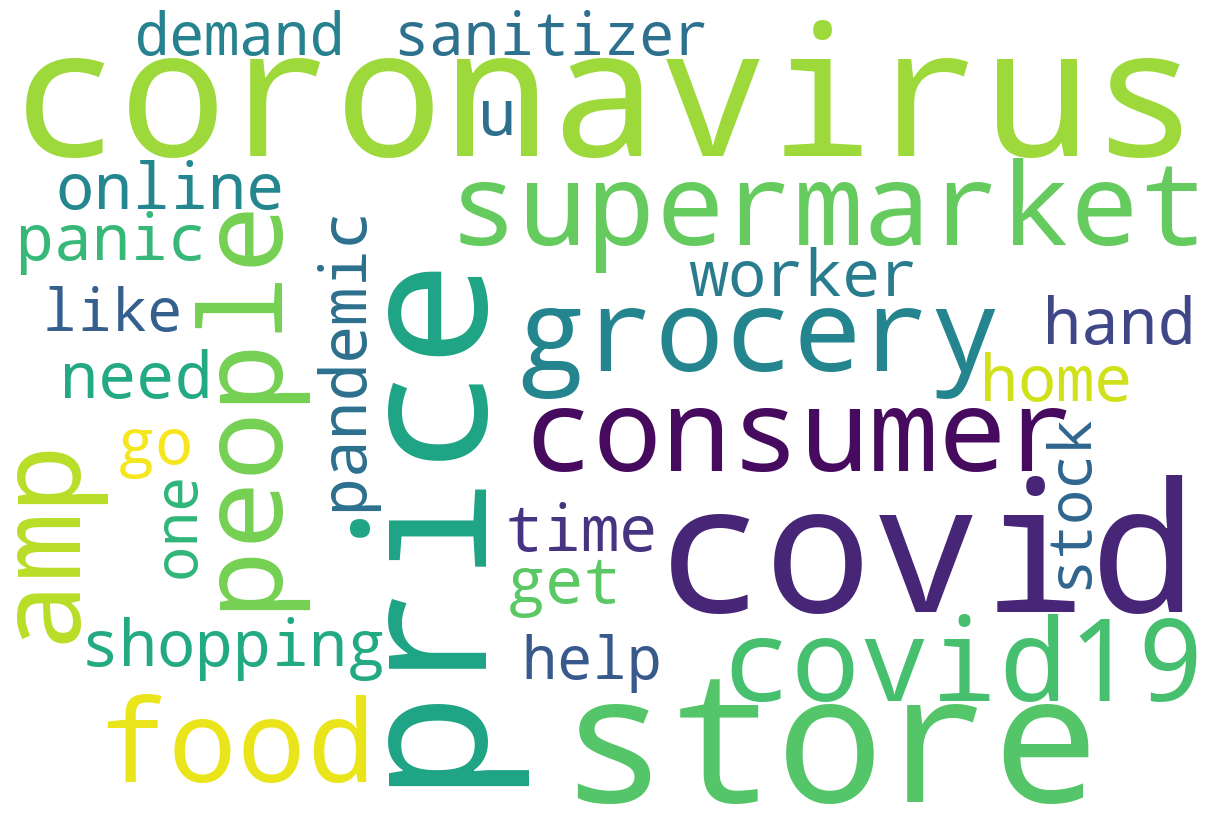

In [18]:
from wordcloud import WordCloud

all_words = " ".join(review for review in clean_tweets.words)

wordcloud = WordCloud(width = 1200, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(str(all_words))
                      
plt.figure(figsize = (15, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [24]:
import scattertext as st
from IPython.display import IFrame
from IPython.core.display import display, HTML
from scattertext import CorpusFromPandas, produce_scattertext_explorer

tweets = tweets.loc[(tweets['Sentiment'] == 'Extremely Negative') | (tweets['Sentiment'] == 'Extremely Positive')]

tweets['parse'] = tweets['Text'].apply(st.whitespace_nlp_with_sentences)

tweets.head()

/var/folders/w1/ddjn79r10gb30q27xq0t_fjw0000gn/T/ipykernel_1894/381632733.py:3: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


,Text,Sentiment,lemmatized_tokens,word_length,parse
4,ready go supermarket covid19 outbreak paranoid...,Extremely Negative,"[ready, go, supermarket, covid19, outbreak, pa...",21,"(ready, go, supermarket, covid19, outbreak, pa..."
11,due covid 19 situation increased demand food p...,Extremely Positive,"[due, covid, 19, situation, increased, demand,...",22,"(due, covid, 19, situation, increased, demand,..."
12,horningsea caring community let look less capa...,Extremely Positive,"[horningsea, caring, community, let, look, le,...",22,"(horningsea, caring, community, let, look, les..."
18,amazon glitch stymies whole foods fresh grocer...,Extremely Positive,"[amazon, glitch, stymy, whole, food, fresh, gr...",26,"(amazon, glitch, stymies, whole, foods, fresh,..."
20,100 nations inficted covid 19 world must play ...,Extremely Negative,"[100, nation, inficted, covid, 19, world, must...",28,"(100, nations, inficted, covid, 19, world, mus..."


In [26]:
corpus = st.CorpusFromParsedDocuments(tweets.iloc[:10000,:], category_col='Sentiment', parsed_col='parse').build()

html = st.produce_scattertext_explorer(corpus,
                         category='Extremely Negative',
                         category_name='Negative',
                         not_category_name='Positive',
                         minimum_term_frequency=5,
                         width_in_pixels=1000,
                         transform=st.Scalers.log_scale_standardize)

file_name = 'Sentimental Words Visualization.html'

open(file_name, 'wb').write(html.encode('utf-8'))

IFrame(src=file_name, width = 1000, height=700)